# U.S. Medical Insurance Costs

In [40]:
import pandas as pd 
import statistics as stat
import matplotlib.pyplot as plt
insurance = pd.read_csv("insurance.csv")
insurance.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [14]:
# for age and sex 
age_sex = insurance[['age', 'sex']]
sex = insurance["sex"].tolist()
age = insurance['age'].tolist()
no_of_sex = {}
# to get the number of males and females in the data
female_count = 0
male_count = 0 
for i in sex:
    if i == "female":
        female_count = female_count + 1
    else: 
        male_count = male_count + 1
no_of_sex["male"] = male_count 
no_of_sex["female"] = female_count 


<function matplotlib.pyplot.show(close=None, block=None)>

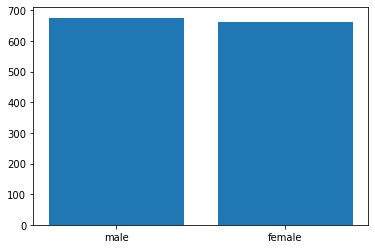

In [21]:
# plot for no of sexes in the plot 
sex = list(no_of_sex.keys())
no_of_sexes = list(no_of_sex.values())
plt.bar(range(len(no_of_sex)), no_of_sexes, tick_label=sex)
plt.show

In [20]:
# to check for the lowest age in the plot 
age_set = set(age)
smallest_number = min(age_set) #18
biggest_number = max(age_set) #64
ages_disparity = {}
under_30 = 0 
under_40 = 0
under_50 = 0
under_70 = 0
for i in age:
    if i > 18 and i <= 30:
        under_30 = under_30 + 1
    elif i > 30 and i <= 40: 
        under_40 = under_40 + 1
    elif i > 40 and i <= 50:
        under_50 = under_50 + 1 
    else:
        under_70 = under_70 + 1 
ages_disparity["18-30"] = under_30
ages_disparity["31-40"] = under_40
ages_disparity["41-50"] = under_50 
ages_disparity["51-64"] = under_70


{'18-30': 375, '31-40': 257, '41-50': 281, '51-64': 425}


<function matplotlib.pyplot.show(close=None, block=None)>

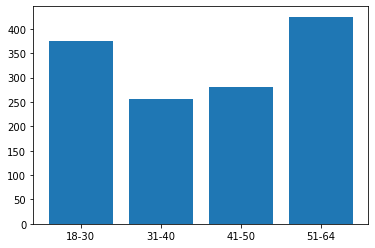

In [24]:
# draw a plot for the ages_disparity 
ages = list(ages_disparity.keys())
age_number = list(ages_disparity.values())
plt.bar(range(len(ages)), age_number, tick_label=ages)
plt.show # shows that the data has more people between the ages of 51-64 
# closely followed by 18-30, can also take into the account that the disparity is greater than others

In [46]:
insurance_cost = insurance["charges"].tolist()
location = insurance["region"].tolist()
print(set(location))
location_cost = list(zip(location, insurance_cost))
location_disparity = {}
Northwest = []
Northeast = []
Southeast = []
Southwest = []
for i in location_cost: 
    if i[0] == "northwest":
        Northwest.append(i[1])
    elif i[0] == "northeast":
        Northeast.append(i[1])
    elif i[0] == "southeast":
        Southeast.append(i[1])
    else:
        Southwest.append(i[1])
northwest_mean = stat.mean(Northwest)
northeast_mean = stat.mean(Northeast)
southeast_mean = stat.mean(Northeast)
southwest_mean = stat.mean(Southwest)
location_disparity["northwest"] = northwest_mean
location_disparity["southwest"] = southwest_mean
location_disparity["northeast"] = northeast_mean
location_disparity["southeast"] = southeast_mean

{'northwest', 'northeast', 'southeast', 'southwest'}


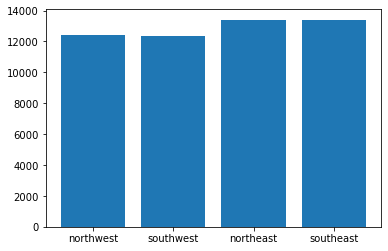

In [44]:
#draw a plot for the average cost per location 
names_location = list(location_disparity.keys())
average_cost = list(location_disparity.values())
plt.bar(range(len(names_location)), average_cost, tick_label=names_location)
plt.show() # shows the east is more expensive than other parts of the country 

In [74]:
# to get the highest insurance cost and the lowest insurance cost, so you can give informed information about who has the best form of unsurance 
highest_insurance_cost = max(insurance_cost)
lowest_insurance_cost = min(insurance_cost)
for index,value in enumerate(insurance_cost):
    if value == highest_insurance_cost:
        index_high = index
    if value == lowest_insurance_cost:
        index_lower = index
lower = insurance.iloc[ index_lower]
print(lower)
high = insurance.iloc[index_high]

age                18
sex              male
bmi             23.21
children            0
smoker             no
region      southeast
charges     1121.8739
Name: 940, dtype: object


In [85]:
# suggestive information
smokering = lower["smoker"]
smoke = "non_smoker" if smokering == "no" else "smoker" 
print("It is clear to have a lower insurance cost you need to be a " + lower['sex'] + " and be " + str(lower["age"])
     + " and also have " + str(lower["children"]) + " child/children with a body mass index of " + str(lower["bmi"]) + " and " + smoke )

It is clear to have a lower insurance cost you need to be a male and be 18 and also have 0 child/children with a body mass index of 23.21 and non_smoker
